<a href="https://colab.research.google.com/github/IBREEZZ/Code_Academy_Makeen2/blob/main/Real_Life_Fraud_Detection_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1: Understanding the Dataset**

**` 1.Business Understanding`**

The dataset includes different transaction types, customer information, and fraud indicators.

- 📌 Key questions explored include:

- Which transaction types are most prone to fraud?
- Are there patterns in transaction amounts linked to fraud?
- Do specific users repeatedly appear in flagged transactions?
- How effective is the legal flagging system?

**` 2.Data Preparation`**

In [ ]:
import pandas as pd
import numpy as np

Load the dataset into a pandas DataFrame.

In [ ]:
df = pd.read_csv('/content/Synthetic_Financial_datasets_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2574227,207,TRANSFER,98607.00,C2096409335,113427.0,14820.00,C1082121606,92367.96,190974.95,0,0
2574228,207,CASH_OUT,37217.98,C1011584424,107839.0,70621.02,C1637597176,0.00,37217.98,0,0
2574229,207,TRANSFER,444713.91,C540800531,12052.0,0.00,C742454193,99502.23,544216.14,0,0
2574230,207,CASH_IN,414438.16,C1967740508,59918.0,474356.16,C1029607217,0.00,0.00,0,0


Display the first few rows to familiarize yourself with the structure
and contents.

In [ ]:
# first 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


List the columns

In [ ]:
# List all columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

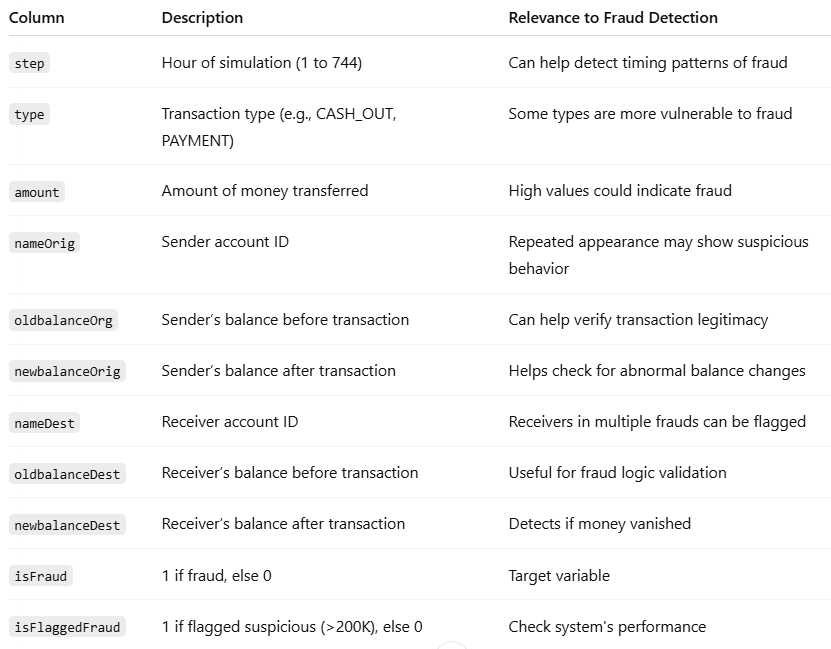

# **Phase 2: Data Cleaning and Exploration**

**` 1.Initial Review `**

Check the num for missing values

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
#some information about the type of columne in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574232 entries, 0 to 2574231
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 216.0+ MB


**Remove or handle columns that are irrelevant for fraud detection.
Justify your choice.**

- After reviewing the dataset, I have decided not to remove any columns, as each one contributes valuable information for fraud detection.

**` 2.Exploratory Analysis `**

Calculate the total number of transactions

In [ ]:
total_transactions = len(df)
print("Total transactions:", total_transactions)

Total transactions: 2574232


categorize them by
type.

In [ ]:
df['type'].value_counts()

,count
type,
CASH_OUT,917541
PAYMENT,859536
CASH_IN,567225
TRANSFER,213434
DEBIT,16496


 Identify the percentage of fraudulent transactions

In [ ]:
total_frauds = df[df['isFraud'] == 1]# the use of 1 is checks each row
fraud_percent = (len(total_frauds) / total_transactions) * 100
print(f"Total fraudulent transactions: {len(total_frauds)} ({fraud_percent:.2f}%)")

Total fraudulent transactions: 2308 (0.09%)


compare
them across transaction types.

In [ ]:
fraud_by_type = df.groupby('type')['isFraud'].mean() * 100
print("Fraud rate by type:\n", fraud_by_type)

Fraud rate by type:
 type
CASH_IN     0.000000
CASH_OUT    0.126643
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.536934
Name: isFraud, dtype: float64


The highest fraud rate is found in CASH_OUT and TRANSFER

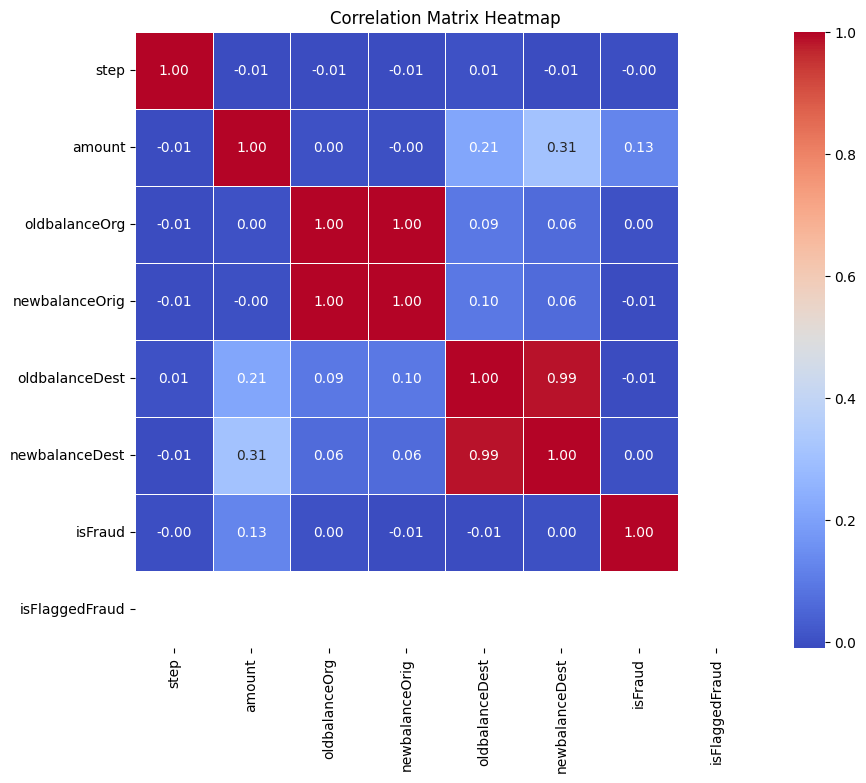

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Create correlation matrix from numeric columns only
corr_matrix = numeric_cols.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()


Examine the distribution of transaction amounts (mean, median,
standard deviation) for both fraudulent and non-fraudulent
transactions.

In [ ]:
# distribution for fraudulent transactions
fraud_stats = df[df['isFraud'] == 1]['amount'].describe()
print("Fraudulent transaction amount stats:\n", fraud_stats)

Fraudulent transaction amount stats:
 count    2.308000e+03
mean     1.279570e+06
std      2.072847e+06
min      1.190000e+02
25%      1.155170e+05
50%      4.114056e+05
75%      1.462036e+06
max      1.000000e+07
Name: amount, dtype: float64


In [ ]:
# distribution for non-fraudulent transactions
nonfraud_stats = df[df['isFraud'] == 0]['amount'].describe()
print("Non-Fraudulent transaction amount stats:\n", nonfraud_stats)

Non-Fraudulent transaction amount stats:
 count    2.571924e+06
mean     1.573917e+05
std      2.549982e+05
min      2.000000e-02
25%      1.264365e+04
50%      7.732054e+04
75%      2.134947e+05
max      7.719103e+06
Name: amount, dtype: float64


# **Phase 3: Real-Life Fraud Detection Analysis**

**` 1.Detecting Suspicious Patterns  `**

Identify and flag transactions exceeding the legal limit (amount >
200,000) as potentially fraudulent (isFlaggedFraud).

In [ ]:
flagged_transactions = df[df['amount'] > 200000]
flagged_transactions

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.00,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.00,C932583850,6267.00,2719172.89,0,0
82,1,TRANSFER,224606.64,C873175411,0.0,0.00,C766572210,354678.92,0.00,0,0
84,1,TRANSFER,379856.23,C1449772539,0.0,0.00,C1590550415,900180.00,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2574195,207,CASH_OUT,214867.82,C1461000082,0.0,0.00,C229896296,6393468.74,6608336.56,0,0
2574211,207,CASH_IN,682877.39,C1456438422,210414.0,893291.39,C1595471722,20074.69,0.00,0,0
2574225,207,CASH_OUT,313306.82,C1598285718,31014.0,0.00,C565718054,600000.99,913307.81,0,0
2574229,207,TRANSFER,444713.91,C540800531,12052.0,0.00,C742454193,99502.23,544216.14,0,0


In [ ]:
# the number of  flagged_transactions >200,000
print("Transactions over 200,000:", len(flagged_transactions))

Transactions over 200,000: 696184


how the flagged potentially  by the system

In [ ]:
print("Flagged by system (isFlaggedFraud = 1):", df['isFlaggedFraud'].sum())

Flagged by system (isFlaggedFraud = 1): 0


Find patterns in fraud-related transactions, such as the
- time step,
- type,
-  transaction amount.

In [ ]:
# Fraud transactions over time (by step)
fraud_step_distribution = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
print("Fraud distribution by step:")
print(fraud_step_distribution.head())

Fraud distribution by step:
step
1    16
2     8
3     4
4    10
5     6
Name: count, dtype: int64


In [ ]:
# Fraudulent transactions by type
print("Fraud count by type:")
print(df[df['isFraud'] == 1]['type'].value_counts())

Fraud count by type:
type
CASH_OUT    1162
TRANSFER    1146
Name: count, dtype: int64


In [ ]:
# Average fraud by transaction amount
print("Average fraud amount by type:")
print(df[df['isFraud'] == 1].groupby('type')['amount'].mean())

Average fraud amount by type:
type
CASH_OUT    1.270480e+06
TRANSFER    1.288787e+06
Name: amount, dtype: float64


**` 2.Group Analysis`**

In [ ]:
grouped = df.groupby('type').agg({
    'amount': ['sum', 'count']
})
print(grouped)

                amount        
                   sum   count
type                          
CASH_IN   9.607568e+10  567225
CASH_OUT  1.669464e+11  917541
DEBIT     8.828353e+07   16496
PAYMENT   9.930441e+09  859536
TRANSFER  1.347118e+11  213434


In [ ]:
fraud = df[df['isFraud'] == 1]

In [ ]:
# (nameOrig)
repeat_orig = fraud['nameOrig'].value_counts().head(10)
print("Top suspicious senders:\n", repeat_orig)

#  (nameDest)
repeat_dest = fraud['nameDest'].value_counts().head(10)
print("Top suspicious recipients:\n", repeat_dest)


Top suspicious senders:
 nameOrig
C1854965389    1
C1305486145    1
C840083671     1
C1420196421    1
C1976399024    1
C1018357975    1
C1615152184    1
C468833365     1
C1482534686    1
C1863683348    1
Name: count, dtype: int64
Top suspicious recipients:
 nameDest
C1013511446    2
C104038589     2
C935310781     2
C1981613973    2
C52390890      2
C904300960     2
C200064275     2
C410033330     2
C1827219533    2
C185805228     2
Name: count, dtype: int64


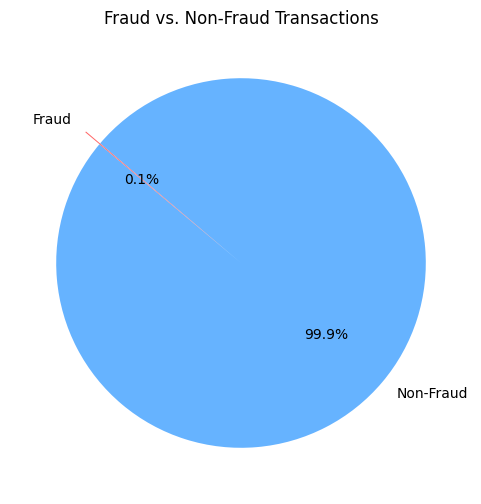

In [ ]:
import matplotlib.pyplot as plt

# Count of fraud and non-fraud
fraud_counts = df['isFraud'].value_counts()

# Pie chart
labels = ['Non-Fraud', 'Fraud']
colors = ['#66b3ff', '#ff6666']
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Fraud vs. Non-Fraud Transactions')
plt.show()


<ipython-input-45-81bf4c1b599d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette='rocket')


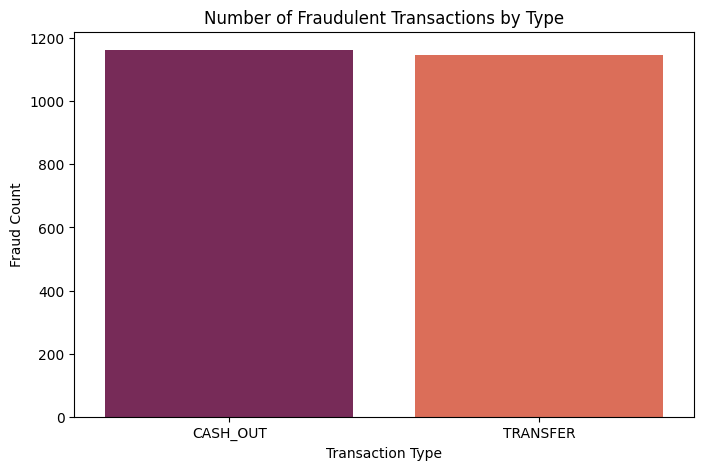

In [ ]:
import seaborn as sns

# Fraud count by type
fraud_by_type = df[df['isFraud'] == 1]['type'].value_counts()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette='rocket')
plt.title('Number of Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Count')
plt.show()


**` 3.Critical Thinking Task `**

One scenario is a large corporate payment exceeding 200,000 that is legitimate (e.g., payroll disbursement). Such transactions may be flagged incorrectly as fraudulent. To reduce false positives, the company should incorporate customer profiles, distinguishing regular high-value customers from irregular high-value fraud attempts, using historical behavior patterns and customer segmentation.

#**Phase 4: Insights and Recommendations**

**` 1.Actionable Insights  `**

We found that most fraud cases occur in two transaction types, TRANSFER and CASH_OUT, which together make up the majority of fraud cases. In contrast, DEBIT and PAYMENT transactions show minimal fraud, indicating that fraudsters prefer channels that allow quick fund transfers and withdrawals. Moreover, fraudulent transactions are typically much larger than legitimate ones, indicating a quick-gain strategy.



A small group of customers are repeated perpetrators of fraud, suggesting patterns of organized fraud or compromised accounts. Despite the system's rule to flag transactions above 200,000 for possible fraud, many flagged transactions turned out to be legitimate, indicating the need for more precise detection. For improved fraud detection, we should focus on high-risk transaction types and amounts, while incorporating deeper behavioral profiling to reduce false positives.

**` 2.Recommendations   `**

- Monitoring should be prioritized for TRANSFER and CASH_OUT transactions, particularly if they exceed a certain amount.




- Reduce false positives for high-value customers by implementing dynamic risk scoring.




- Add real-time alerts for repeated large transactions and for accounts showing suspicious behavior.